<a href="https://colab.research.google.com/github/Suraj5188/Capstone_Project_3/blob/main/Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Capstone_Project_3**

#**Team-1**

#**Project : Exploring Factors of Life Expectancy**

Life expectancy is an estimate of how long a person would live on average. Throughout the years, there have been lot of studies on factors affecting life expectancy. However, these studies have not taken into account the possibility that human development index could have a significant effect. Additionally, past studies were conducted using multiple linear regressions based on world data for only one year. Therefore, there is reason to consider global data from 2000 to 2015 instead. This project relies heavily on the accuracy of the data which is provided by the Global Health Observatory (GHO) data repository under World Health Organization (WHO)(1)
. Our goal is to determine the most significant variables to create an optimal linear regression model for predicting life expectancy. For instance, if current mortality rates in every age group remained constant throughout, then it would be an easily understood measure to which any person could directly relate (2)
. In reality, life expectancy is affected by a variety of socioeconomic, genetic and environmental factors. Therefore, it makes for a good area of study to investigate via statistical methods to better understand the measure of life expectancy.

#**Problem Statement :**

![](https://t4.ftcdn.net/jpg/05/65/10/59/360_F_565105966_XHgA0FVZxVPUKpk0eTFlU6HXNYhQ55FC.jpg)

* Which Public Health Factors have the Greatest Impact on Life Expectancy

* We need analyze & find the insights,which feature impact on life expectancy

* The dataset of the health status of all countries over time and includes statistics on life expectancy, adult mortality, and more.
Using this dataset, explore the relationships between various variables.

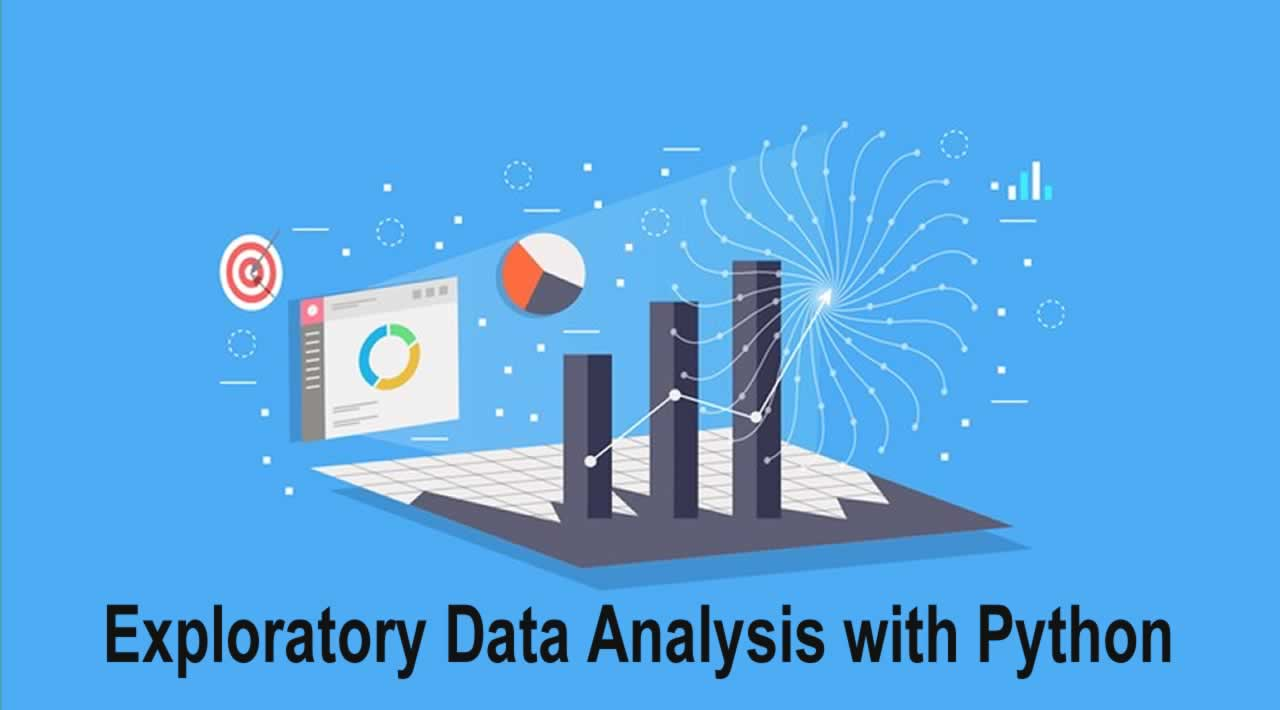

# **Index:**

**1. Lets Invite Some Libraries**

**2. Mounting our Drive/Load dataset**

**3. Dataset Information**

**4. Data Cleaning/Wrangling**

**5. Summary of Statistics**

**6. Numerical & Catgorical data**

**7. Distributions of the variables/features**

**8. Univariate Analysis**

**9. Bivariate Analysis**

**10. Multivariate Analysis**

**11. Data Visulization in detail**

**12. Conclusion**

#**1.Lets Invite Some Libraries**

In [1]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import missingno as msno

pd.set_option('display.max_columns',None)

import os
import warnings 
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS
import klib

#**2. Mounting our Drive/Load dataset**

In [3]:
# Load dataset

df=pd.read_csv('/content/drive/MyDrive/Demo_DATA_csv_files/Capstone_Project_3/Life Expectancy Data.csv')

# **3. Dataset Information**

In [4]:
df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI  under-five deaths   Polio  Total expenditure  Diphtheria   HIV/AIDS  \
0  19.1                  83    6.0               8.16        65.0        0.1   
1  18.6                  86   58.0               8.18        62.0        0.1   
2  18.1                  89   62.0               8.13        64.0        0.1   
3  17.6                  93   67.0               8.52        67.0        0.1   
4  17.2                  97   68.0               7.87        68.0        0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [5]:
df.tail()

Country  Year      Status  Life expectancy  Adult Mortality  \
2933  Zimbabwe  2004  Developing             44.3            723.0   
2934  Zimbabwe  2003  Developing             44.5            715.0   
2935  Zimbabwe  2002  Developing             44.8             73.0   
2936  Zimbabwe  2001  Developing             45.3            686.0   
2937  Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2933             27     4.36                     0.0         68.0        31   
2934             26     4.06                     0.0          7.0       998   
2935             25     4.43                     0.0         73.0       304   
2936             25     1.72                     0.0         76.0       529   
2937             24     1.68                     0.0         79.0      1483   

       BMI  under-five deaths   Polio  Total expenditure  Diphtheria  \
2933  27.1                  42   67.0               7.13        65.0   
2934  26.7                  41    7.0               6.52        68.0   
2935  26.3                  40   73.0               6.53        71.0   
2936  25.9                  39   76.0               6.16        75.0   
2937  25.5                  39   78.0               7.10        78.0   

       HIV/AIDS         GDP  Population  thinness  1-19 years  \
2933       33.6  454.366654  12777511.0                   9.4   
2934       36.7  453.351155  12633897.0                   9.8   
2935       39.8   57.348340    125525.0                   1.2   
2936       42.1  548.587312  12366165.0                   1.6   
2937       43.5  547.358878  12222251.0                  11.0   

      thinness 5-9 years  Income composition of resources  Schooling  
2933                 9.4                            0.407        9.2  
2934                 9.9                            0.418        9.5  
2935                 1.3                            0.427       10.0  
2936                 1.7                            0.427        9.8  
2937                11.2                            0.434        9.8

In [6]:
df.shape

(2938, 22)

In [7]:
df.size

64636

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Observation :**

* We could see that features/columns/fields & its datatype, along with non-null count

* Here country & status feature are object type in the given data set

* Also thir Year,infant deaths,Measles,under-five deaths in int data type

* Remaining features in float dtype

#**Let go and see the given data set is clean or not**

# **4. Data Cleaning/Wrangling**

**The process of cleaning and unifying messy and complex data sets for easy access and analysis**

In [11]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
# Here we understanding the how many null values & their percentage

total=df.isnull().sum().sort_values(ascending=False)
percentage=(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

missing_data=pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [13]:
# Let's see missing data & %age

missing_data.head(22)

Total  Percentage
Population                         652    0.221920
Hepatitis B                        553    0.188223
GDP                                448    0.152485
Total expenditure                  226    0.076923
Alcohol                            194    0.066031
Income composition of resources    167    0.056841
Schooling                          163    0.055480
thinness 5-9 years                  34    0.011572
thinness  1-19 years                34    0.011572
BMI                                 34    0.011572
Polio                               19    0.006467
Diphtheria                          19    0.006467
Life expectancy                     10    0.003404
Adult Mortality                     10    0.003404
 HIV/AIDS                            0    0.000000
Country                              0    0.000000
Year                                 0    0.000000
Measles                              0    0.000000
percentage expenditure               0    0.000000
infant deaths                        0    0.000000
Status                               0    0.000000
under-five deaths                    0    0.000000

**Observation :**

* We can observe that their are lot of missing values so we can't drop it
* We will handled this missing 'nan' values by filling them

**Let's Understand the missing values by graphically for better understanding**

Text(0.5, 1.0, 'Missing Values')

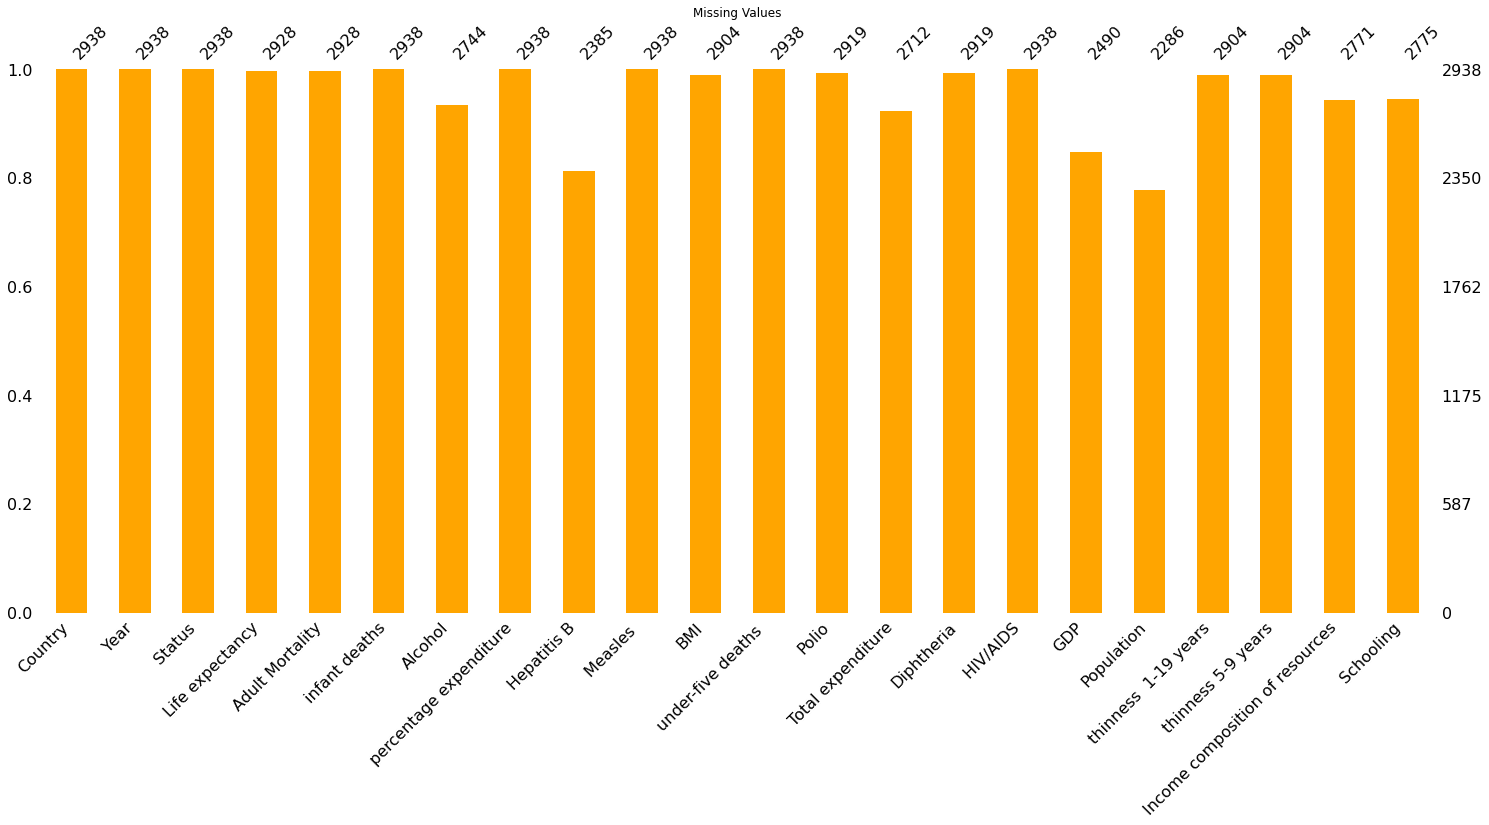

In [14]:
msno.bar(df,color='orange')
plt.title('Missing Values')

**Observation :**

* Left hand i.e y-axis shows from 0.0-1.0 that 1.0 represent 100% data completes

* Where right hand describe the indexes i.e rows

* And top scale shows the non-null counts in each feature

#**Now we deal with missing value**

In [15]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

**1. Let's deal with Life expectancy**

In [16]:
# Filling missing values for Life expectancy list by median

df['Life expectancy'].fillna(df['Life expectancy'].median(),inplace=True)

**2. Let's deal with Adult Mortality**

In [17]:
# Filling missing values for Adult Mortality list by median

df['Adult Mortality'].fillna(df['Adult Mortality'].median(),inplace=True)

**3. Let's deal with Alcohol**

In [18]:
# Filling missing values for Alcohol list by median

df['Alcohol'].fillna(df['Alcohol'].median(),inplace=True)

**4. Let's deal with Hepatitis B**

In [19]:
# Filling missing values for Hepatitis B list by median

df['Hepatitis B'].fillna(df['Hepatitis B'].median(),inplace=True)

**5. Let's deal with BMI**

In [20]:
# Filling missing values for BMI list by median

df['BMI'].fillna(df['BMI'].median(),inplace=True)

**6.Let's deal with Polio**

In [21]:
# Filling missing values for Polio list by median

df['Polio'].fillna(df['Polio'].median(),inplace=True)

**7.Let's deal with Total expenditure**

In [22]:
# Filling missing values for Total expenditure list by median

df['Total expenditure'].fillna(df['Total expenditure'].median(),inplace=True)

**8.Let's deal with Diphtheria**

In [23]:
# Filling missing values for Diphtheria list by median

df['Diphtheria'].fillna(df['Diphtheria'].median(),inplace=True)

**9.Let's deal with GDP**

In [24]:
# Filling missing values for GDP list by median

df['GDP'].fillna(df['GDP'].median(),inplace=True)

**10.Let's deal with Population**

In [25]:
# Filling missing values for Population list by median

df['Population'].fillna(df['Population'].median(),inplace=True)

**11. Let's deal with thinness  1-19 years**

In [26]:
# Filling missing values for thinness  1-19 years list by median

df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].median(),inplace=True)

**12. Let's deal with  thinness 5-9 years**

In [27]:
# Filling missing values for thinness 5-9 years list by median

df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].median(),inplace=True)

**13. Let's deal with Income composition of resources**

In [28]:
# Filling missing values for Income composition of resources list by median

df['Income composition of resources'].fillna(df['Income composition of resources'].median(),inplace=True)

**14.Now lastly we deal with Schooling**

In [29]:
# Filling missing values for Schooling list by median

df['Schooling'].fillna(df['Schooling'].median(),inplace=True)

In [30]:

df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

**Observation :**

* We can see that their is no mising values in given dataset we had fill missing values or drop it

**We are done by handling missing value it's time to remove duplicates**

In [31]:
df.shape

(2938, 22)

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.shape

(2938, 22)

**Observation :**

* We found that thier is no duplicates

# **5. Summary of Statistics**

In [34]:
# Statistical information about the dataset

display(df.describe().round(2))

Year  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
count  2938.00          2938.00          2938.00        2938.00  2938.00   
mean   2007.52            69.23           164.73          30.30     4.55   
std       4.61             9.51           124.09         117.93     3.92   
min    2000.00            36.30             1.00           0.00     0.01   
25%    2004.00            63.20            74.00           0.00     1.09   
50%    2008.00            72.10           144.00           3.00     3.76   
75%    2012.00            75.60           227.00          22.00     7.39   
max    2015.00            89.00           723.00        1800.00    17.87   

       percentage expenditure  Hepatitis B   Measles       BMI  \
count                 2938.00      2938.00    2938.00  2938.00   
mean                   738.25        83.02    2419.59    38.38   
std                   1987.91        23.00   11467.27    19.94   
min                      0.00         1.00       0.00     1.00   
25%                      4.69        82.00       0.00    19.40   
50%                     64.91        92.00      17.00    43.50   
75%                    441.53        96.00     360.25    56.10   
max                  19479.91        99.00  212183.00    87.30   

       under-five deaths     Polio  Total expenditure  Diphtheria   HIV/AIDS  \
count             2938.00  2938.00            2938.00     2938.00    2938.00   
mean                42.04    82.62               5.92       82.39       1.74   
std                160.45    23.37               2.40       23.66       5.08   
min                  0.00     3.00               0.37        2.00       0.10   
25%                  0.00    78.00               4.37       78.00       0.10   
50%                  4.00    93.00               5.76       93.00       0.10   
75%                 28.00    97.00               7.33       97.00       0.80   
max               2500.00    99.00              17.60       99.00      50.60   

             GDP    Population  thinness  1-19 years  thinness 5-9 years  \
count    2938.00  2.938000e+03               2938.00             2938.00   
mean     6611.52  1.023085e+07                  4.82                4.85   
std     13296.60  5.402242e+07                  4.40                4.49   
min         1.68  3.400000e+01                  0.10                0.10   
25%       580.49  4.189172e+05                  1.60                1.60   
50%      1766.95  1.386542e+06                  3.30                3.30   
75%      4779.41  4.584371e+06                  7.10                7.20   
max    119172.74  1.293859e+09                 27.70               28.60   

       Income composition of resources  Schooling  
count                          2938.00    2938.00  
mean                              0.63      12.01  
std                               0.21       3.27  
min                               0.00       0.00  
25%                               0.50      10.30  
50%                               0.68      12.30  
75%                               0.77      14.10  
max                               0.95      20.70

#**6. Numerical & Catgorical data**

In [35]:
# Ctgorical feature

categorical= df.select_dtypes(include= "O")

# Numerical feature

numerical= df.select_dtypes(exclude= "O")

**Catgorical Data**

In [36]:
categorical.describe()

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

**Numerical Data**

In [37]:
numerical.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.234717       164.725664      30.303948   
std       4.613841         9.509115       124.086215     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.546875              738.251295    83.022124    2419.592240   
std       3.921946             1987.914858    22.996984   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       1.092500                4.685343    82.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.390000              441.534144    96.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths         Polio  Total expenditure  \
count  2938.000000         2938.000000  2938.000000        2938.000000   
mean     38.381178           42.035739    82.617767           5.924098   
std      19.935375          160.445548    23.367166           2.400770   
min       1.000000            0.000000     3.000000           0.370000   
25%      19.400000            0.000000    78.000000           4.370000   
50%      43.500000            4.000000    93.000000           5.755000   
75%      56.100000           28.000000    97.000000           7.330000   
max      87.300000         2500.000000    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2938.000000  2938.000000    2938.000000  2.938000e+03   
mean     82.393125     1.742103    6611.523863  1.023085e+07   
std      23.655562     5.077785   13296.603449  5.402242e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     580.486996  4.189172e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    4779.405190  4.584371e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2938.000000         2938.000000   
mean               4.821886            4.852144   
std                4.397621            4.485854   
min                0.100000            0.100000   
25%                1.600000            1.600000   
50%                3.300000            3.300000   
75%                7.100000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2938.000000  2938.000000  
mean                          0.630362    12.009837  
std                           0.205140     3.265139  
min                           0.000000     0.000000  
25%                           0.504250    10.300000  
50%                           0.677000    12.300000  
75%                           0.772000    14.100000  
max                           0.948000    20.700000

#**7. Distributions of the variables/features**

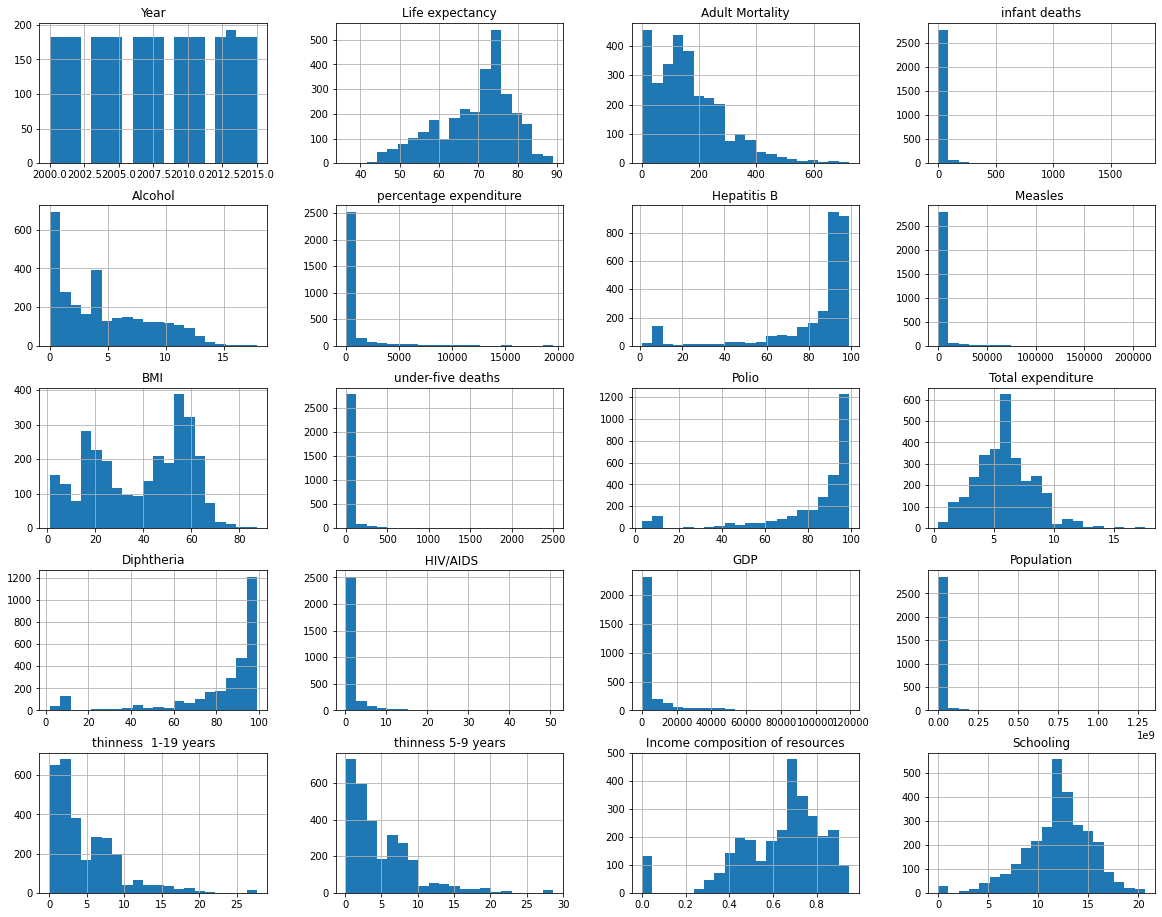

In [38]:
df.hist(figsize=(20,16),bins=20)
plt.show()

The next step in the task of Life Expectancy analysis is to deal with outliers, let’s have a look at the outliers and then we will see how we can deal with the outliers

In [39]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

# **Let's us understand now which country occur most frequently in the given dataset with the help of world cloud**

In [40]:
df['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

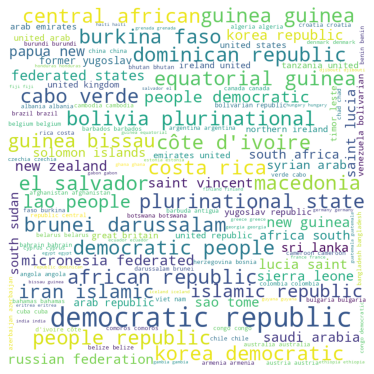

In [41]:

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Country:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**Observation:**

* The world cloud shows visulization representation for the text data

* Where the size of each word indicates its frequency or importance

* We can observe that democratic republic,central african,afican republic,iran & islamic etc. they are most frequenmt occur in the given dataset.

#**8. Univariate Analysis**

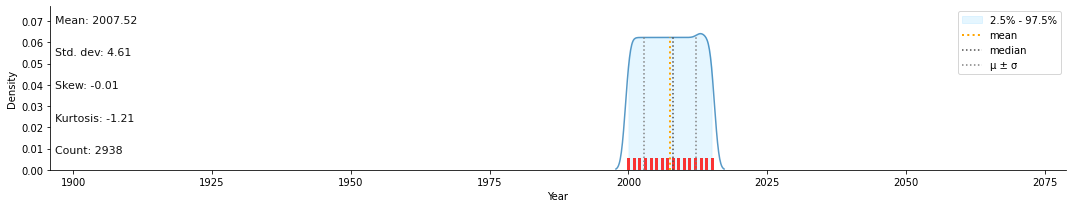

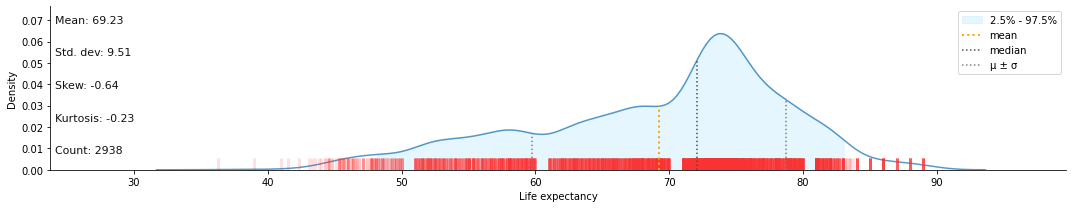

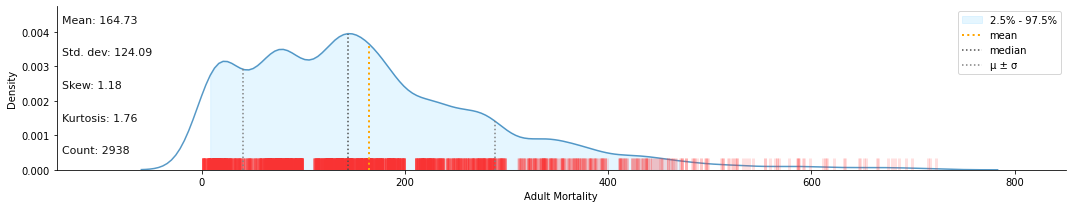

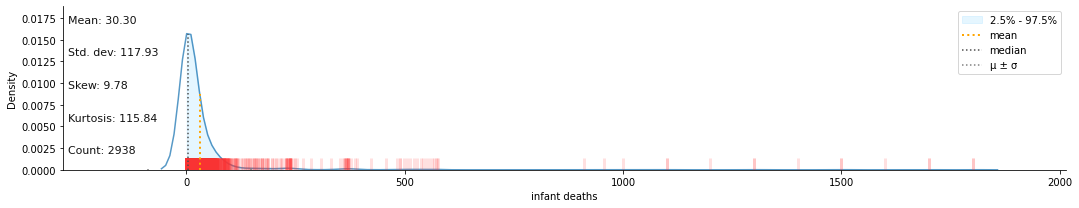

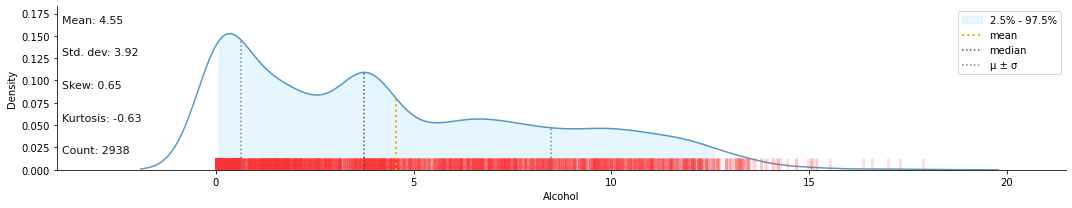

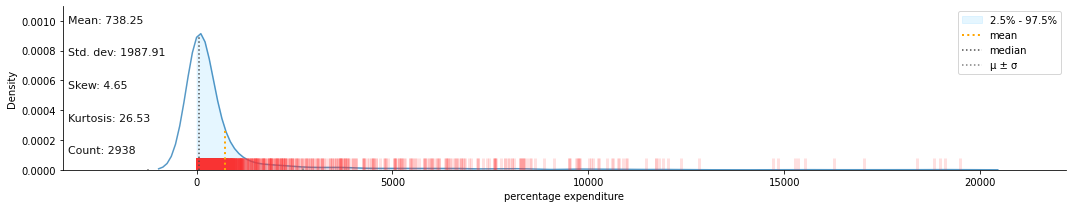

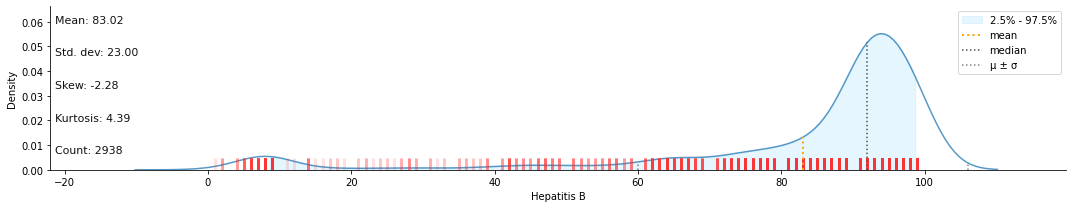

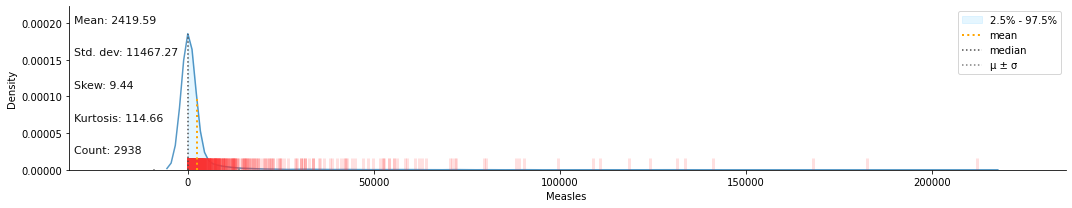

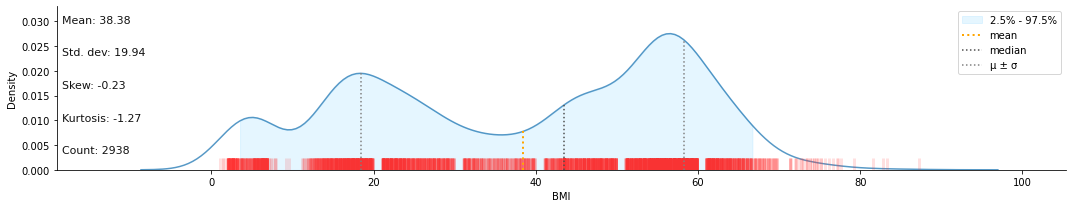

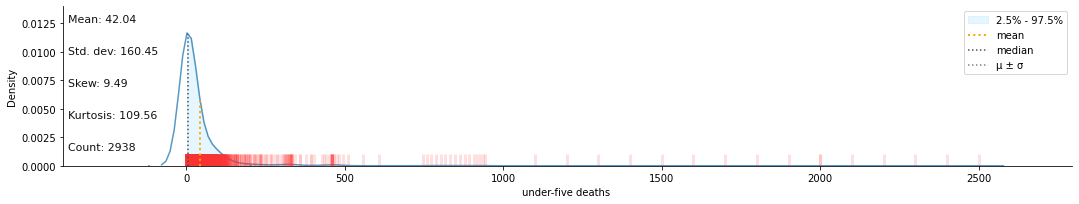

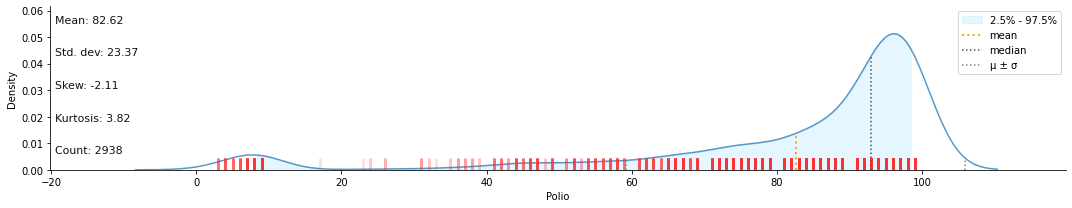

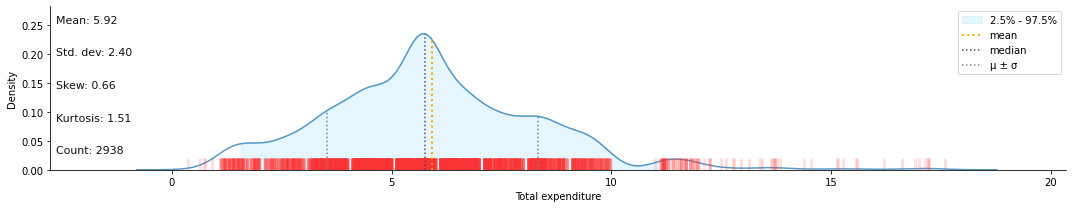

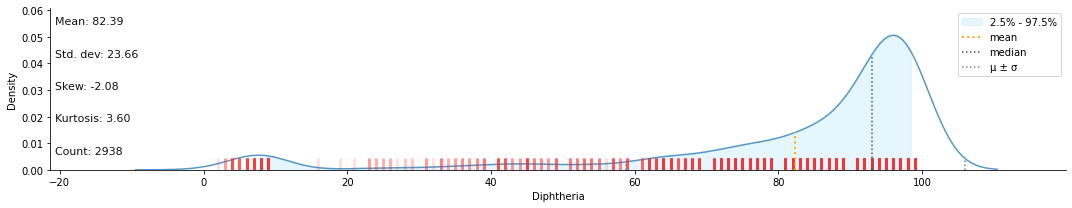

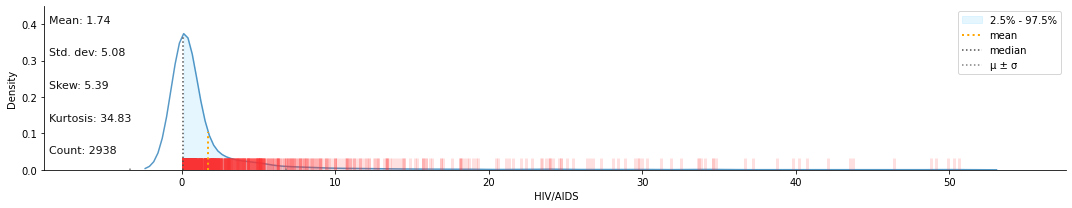

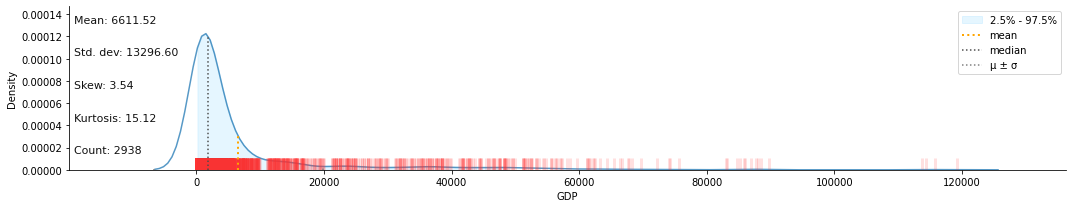

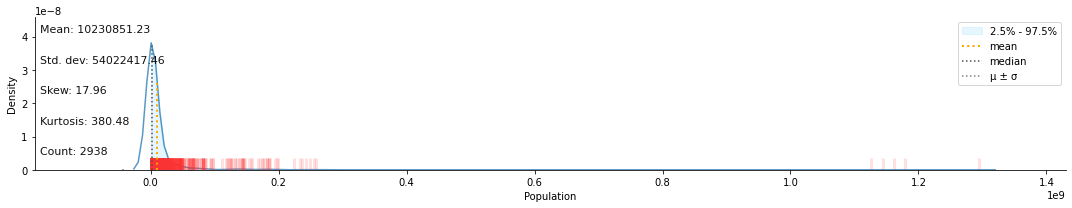

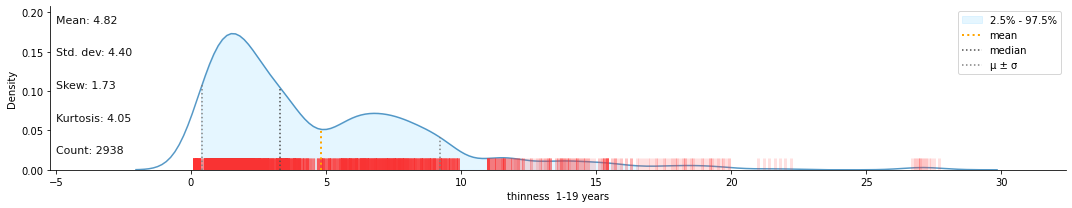

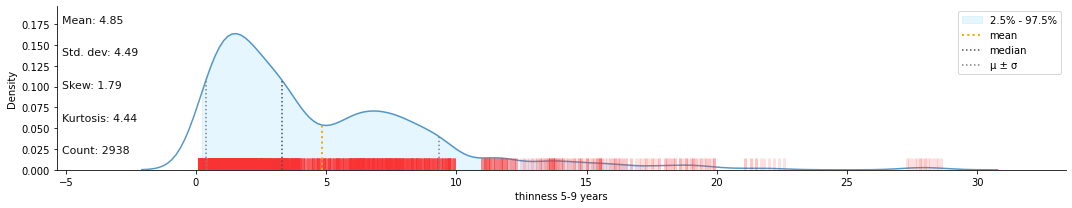

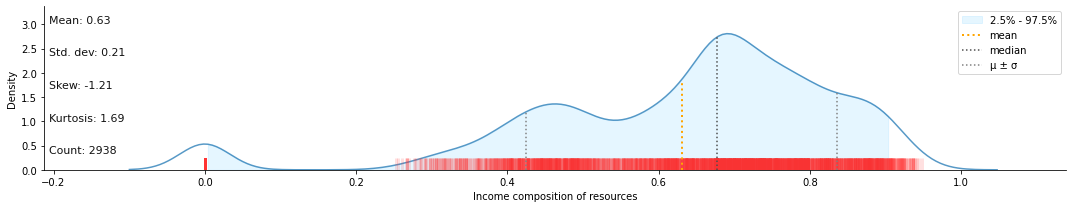

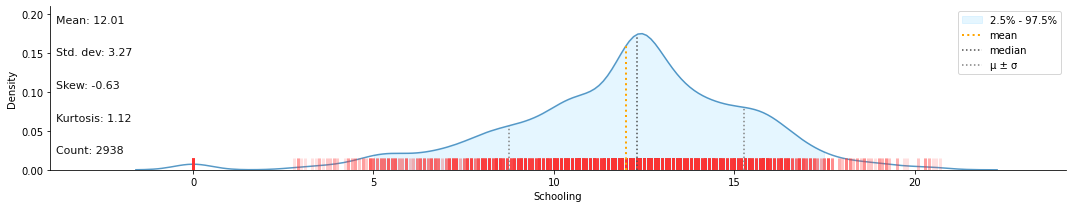

In [42]:
for feature in numerical.columns:
    #sns.distplot(x=numerical[feature])
    klib.dist_plot(numerical[feature])
    plt.show()

**Observation:**

* The univariate analysis basically tells us how data in each feature is distributed. 

* We can observe that each feature has given a statistical information & tell us how the data is distributed.

#**9. Bivariate Analysis :**

**Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset**

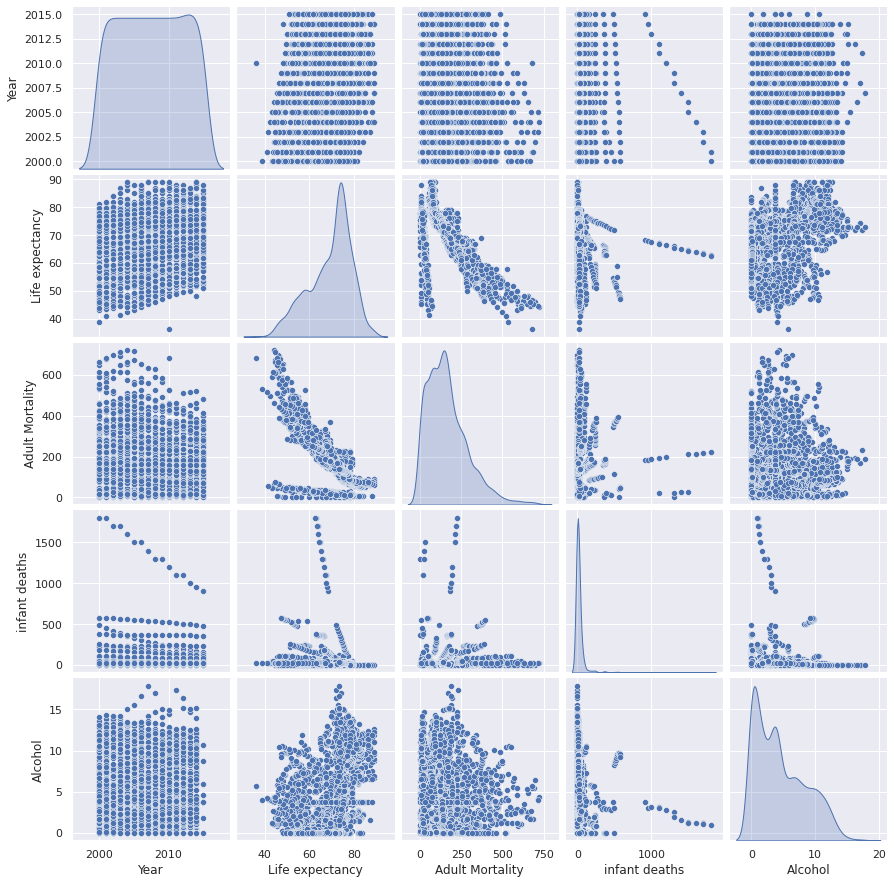

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   
# to plot density curve instead of the histogram on the diagram # Kernel density estimation(kde)

**Observation :**

**Pair Plot provides below insights:**

* More than two variables or features are analyzed together,that how they are related to each other.

* Infant death decreases in year 2000 to 2010.

* Life expectancy & adult mortality are negatively correleated with each other.

* As a infant deaths decreases life expectancy also decreases.

* Alochol consumption decreases as adult mortality also decreases.

#**10.Multi-Variate Analysis**

# **Correlation**

**Do various predicting factors that have been chosen initially really affect Life expectancy?**

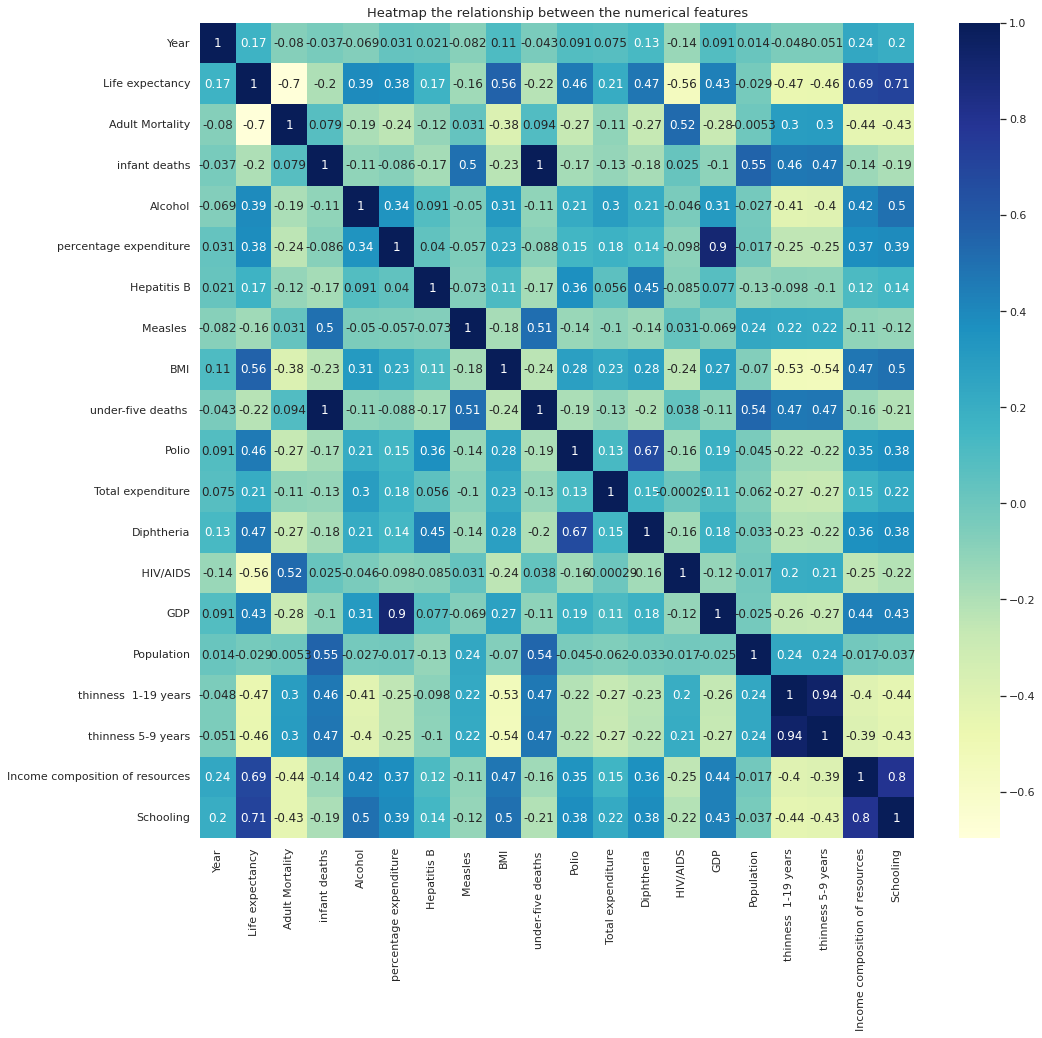

In [44]:
plt.rcParams['figure.figsize']=(16,15)

sns.heatmap(df.corr(),cmap=plt.cm.YlGnBu,annot=True)

#klib.corr_plot(df)
plt.title('Heatmap the relationship between the numerical features',fontsize=13)
plt.show()

**Observation :**

* Dark color represents a positive correlation between numerical features.

* Life expectancy considerably correlates with Adult Mortality BMI, Schooling HIV/AIDS ICOR, and GOP The following insights can be drawn based on the correlation heatma

* Life expectancy and Adult Mortality rates have a high negative correlation which is also anticipated

* BMI has a stive correlation with Life expectancy

* GDP also has a positive correlation with Life expectancy, which can be inferred that as the country's GDP

* Increases, life expectancy also increases Not surprisingly Schooling years have a high positive correlation with Life expectancy Proper schooling leads to the adoption of healthy habits and discipline

#**11. Data Visuilization in detail**


# **In data visuilizing where we understand which various predicting factors that have been chosen is initially really affect Life expectancy?**




**Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?**


In [45]:
# life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan

px.scatter(df,x='Life expectancy',y='percentage expenditure',color='Country',size='Year',title='<b> Life Expectancy Versus expenditure')

**Observation :**

* Here we can clearly observe that their are very large number of data points from 40-60 where life expectancy is less than 65 & their percentage expenditure is also low.

* Where the life expectancy is greater than 70 percentage expenditure is more than 1000

* So to improve the life expectancy countries need to improve their percentage expenditure.



**How do Infant and Adult mortality rates affect life expectancy?**


In [46]:
px.scatter_3d(df.sort_values(by='Year'),y='Adult Mortality',x='Life expectancy',
              z='infant deaths',size='Life expectancy',color='Country',
              title='Infant and Adult mortality rates affect life expectancy')

**Observation :**


* adult mortality are decreases life expectancy also decreases & correleated with each other.

* As a infant deaths decreases life expectancy also decreases.


**What is the impact of schooling on the lifespan of humans?**

In [47]:
px.scatter(df,x='Life expectancy',y='Schooling',size='Year',color='Country',title='<b>Impact of schooling on the lifespan of humans')

**Observation :**

* As a schooling increases the life expectancy also increases.

* Countries like iceland,Spain,Netherland,Germany etc. where the countries life expectancy is increased where schooling increase.

* Which countries has lower schooling data points there are life expectancy is lower compared to other schooling data point.


**Most Status Countries**

In [48]:
df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [49]:
Status_ats=(df['Status']).value_counts().index
Status_ats

Index(['Developing', 'Developed'], dtype='object')

In [50]:
Status_values=(df['Status']).value_counts().values
Status_values

array([2426,  512])

Text(0.5, 1.0, 'Most Status Countries')

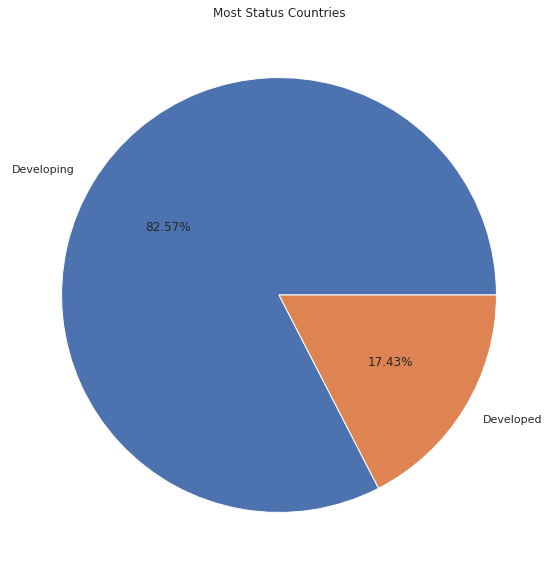

In [51]:
plt.rcParams['figure.figsize']=(16,10)
plt.pie(Status_values,labels=Status_ats,autopct='%1.2f%%')
plt.title('Most Status Countries')
     

**Observation :**

* We can see that their is most developing status of countries its about the 82.57%

* And developed is about 17.43%

**Which Countries most life expectancy**

In [52]:
fig=px.violin(df,x='Status',y='Life expectancy',color='Status',box=True,title='Life expectancy Based on Countries status')
fig.show()

**Observation :**

* Developed countries has maximum life expectancy around 70-90

* Developing countries has lower life expectancy around 70-80 compare to developed.

**Country wise life expectancy**

In [53]:
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life expectancy',animation_frame='Country',animation_group='Year',color='Country',markers=True,title='<b> Country wise Life Expectancy over Years')
fig.show()

**Observation :**

*  Here we can observe that country wise life expectancy over the years


**Does Life Expectancy have a positive or negative relationship with drinking alcohol?**


In [54]:
fig = px.scatter(df, x="Life expectancy", y="Alcohol",title='Life Expectancy have a positive or negative relationship with drinking alcohol')
fig.show()

**Observation :**

* Low Positive relation between life expectancy & alochol where all the points are scattered


**Do densely populated countries tend to have a lower life expectancy?**


In [55]:
rs=df.groupby(['Country'],as_index=False).agg(
    life_expectancy=('Life expectancy','mean'),
    Popula_tion=('Population','mean')
)
rs

Country  life_expectancy   Popula_tion
0                           Afghanistan         58.19375  9.972260e+06
1                               Albania         75.15625  6.969116e+05
2                               Algeria         73.61875  2.164983e+07
3                                Angola         49.01875  1.014710e+07
4                   Antigua and Barbuda         75.05625  1.386542e+06
..                                  ...              ...           ...
188  Venezuela (Bolivarian Republic of)         73.38750  1.386542e+06
189                            Viet Nam         74.77500  1.386542e+06
190                               Yemen         63.86250  1.386542e+06
191                              Zambia         53.90625  6.260246e+06
192                            Zimbabwe         50.48750  8.021343e+06

[193 rows x 3 columns]

In [56]:
px.scatter(df,x='Life expectancy',y='Population',size='Year',color='Country',title='<b>densely populated countries tend to have a lower life expectancy')

**Observation :**

* Where the population in some countries high their is low life expectancy countries are philipines,morroccow etc..

* In some countries like spain,Germany,France has highest population but life expectancy is between 76-79


**What is the impact of Immunization coverage on life Expectancy?**

In [57]:
# Immunization coverage is the polio
# Here we have to find out the What is the impact of polio on life Expectancy

fig=px.histogram(df,x='Life expectancy',y='Polio',title='impact of Immunization coverage on life Expectancy')
fig.show()

**Observation :**

* Where the sum of polio is high their life expectancy is more than 70

* The sum of polio size is matter on life expectancy

**What is the impact of life expectancy versus BMI of Countries in every Year**

In [58]:
px.scatter(df.sort_values(by='Year'),y='BMI',x='Life expectancy',animation_frame='Year',animation_group='Country',color='Country',size='Life expectancy',opacity=0.6,title='<b> Life expectancy versus BMI of Countries in every Year')

**Observation :**

*  BMI of 22.5 to 24.9 has life expectancy is less than 65

*  But, graph also shows whose BMI is 20 their life expectancy is 69 to 71

* If BMI is more than 30 their life expectancy is more than 67

**Which Top 10 countries as a life expectancy**

In [59]:
rs3=df.groupby(['Country']).agg(
    country_wise_life_expectancy=('Life expectancy','mean')
).sort_values(by='country_wise_life_expectancy',ascending=False).head(10)
rs3

country_wise_life_expectancy
Country                                  
Japan                            82.53750
Sweden                           82.51875
Iceland                          82.44375
Switzerland                      82.33125
France                           82.21875
Italy                            82.18750
Spain                            82.06875
Australia                        81.81250
Norway                           81.79375
Canada                           81.68750

In [60]:
fig=px.bar(rs3,y='country_wise_life_expectancy',title='Top 10 countries as a life expectancy',color_discrete_sequence=[
                 'green'])
fig.show()

**Observation :**

* Here we can observe that Japan,Sweden,Iceland,Switzerland,France,Itly,Spain has life expectancy is highest is about 82.

* Also, the Australia,Norway,Canda has life expectancy is 81.8.

**Which Top 10 countries as a lowest life expectancy**

In [61]:
rs5=df.groupby(['Country']).agg(
    country_wise_life_expectancy=('Life expectancy','mean')
).sort_values(by='country_wise_life_expectancy').head(10)
rs5

country_wise_life_expectancy
Country                                               
Sierra Leone                                  46.11250
Central African Republic                      48.51250
Lesotho                                       48.78125
Angola                                        49.01875
Malawi                                        49.89375
Chad                                          50.38750
Côte d'Ivoire                                 50.38750
Zimbabwe                                      50.48750
Swaziland                                     51.32500
Nigeria                                       51.35625

In [62]:
fig=px.bar(rs5,y='country_wise_life_expectancy',title='Top 10 countries as a lowest life expectancy',color_discrete_sequence=[
                 'blue'])
fig.show()

**Observation :**

* Country Sierra Leone life expectancy has 46

* Countries like Central African Republic,Lesotho their life expectancy has 48

* In this countries Angola,Malawi life expectancy has 49

* Countries Chad,Côte d'Ivoire & Zimbabwe their life expectancy has 50.

* Swaziland,Nigeria their life expectancy has 51.

**Country Status Comparison on Life Expectancy**

In [63]:
# In this data, country status is devied to Developed and Developing Country. 
# We want to compare the average life expectancy betweeen developed and developing country

rs2=df.groupby(['Status']).agg(
    Life_expectancy=('Life expectancy','mean')
)
rs2

Life_expectancy
Status                     
Developed         79.197852
Developing        67.132028

In [64]:
colors=['Developed','Developing']
fig=px.bar(rs2,color=colors,title='Country Status Comparison on Life Expectancy')
fig.show()

**Observation :**

* We can observe here developed countries has life expectancy is 79

* And developing countries has 69 life expectancy. 

#**12. Conclusion :**

* Life expectancy is number of age that organism expected to life. This have several parameter that having positive correlation and negative correlation. positive correlation means, if value of parameter increases, so the life expectancy increases. And negative correlation means, if value of parameter decreases, so the life expectancy decreases.

* The average of life expectancy from 193 countries is 69.22 years old. Japan have the highest life expectancy in 82.53750 years old and Sierra Leone have the lowest life expectancy in just 46.11250 years old.

* Indonesia have average life expectancy in 67.56 years old. This still below the global average life expectancy. Country with developing status have life expectancy below the global average. So they need to increases the positive correlation life expectancy parameter significantly and decreases the negative correlation life expectancy parameter significantly. Thats will make their life expectancy increases.




![](https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif)